In [1]:
classes = ["damaged_infra" , "damaged_nature" , "fire" , "flood" , "human_damage" , "non_damage"]


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text



2024-06-28 16:20:36.394418: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 16:20:36.456686: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-28 16:20:36.817677: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 16:20:38.547097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import pandas as pd

df = pd.read_csv("text_data.csv")

In [4]:
df.groupby('CLASSES').describe()

CAPTION         \
                                      count unique   
CLASSES                                              
damage_infrastructure                  1390   1310   
damaged_nature                          465    460   
fires                                   388    381   
flood                                   385    365   
human_damage                            239    198   
non_damage                             2957   2733   
yemencrisis_2015-04-22_17-39-59.txt       7      7   

                                                                                        \
                                                                                   top   
CLASSES                                                                                  
damage_infrastructure                                                     #sandydamage   
damaged_nature                                                            #sandydamage   
fires                                Bronx - 653 Crotona Park North\n4 alarm fire t...   
flood                                                                     #Accrafloods   
human_damage                         Syrian regime committed a new massacre today i...   
non_damage                           Latest Beautiful Designs of High Quality Set# ...   
yemencrisis_2015-04-22_17-39-59.txt  - The situation in Yemen is one of the worst, ...   

                                          
                                    freq  
CLASSES                                   
damage_infrastructure                 13  
damaged_nature                         3  
fires                                  3  
flood                                  9  
human_damage                           6  
non_damage                            29  
yemencrisis_2015-04-22_17-39-59.txt    1

In [5]:
df = df[df['CLASSES'] != "yemencrisis_2015-04-22_17-39-59.txt"]

In [6]:
df.groupby('CLASSES').describe()

CAPTION         \
                        count unique   
CLASSES                                
damage_infrastructure    1390   1310   
damaged_nature            465    460   
fires                     388    381   
flood                     385    365   
human_damage              239    198   
non_damage               2957   2733   

                                                                               
                                                                     top freq  
CLASSES                                                                        
damage_infrastructure                                       #sandydamage   13  
damaged_nature                                              #sandydamage    3  
fires                  Bronx - 653 Crotona Park North\n4 alarm fire t...    3  
flood                                                       #Accrafloods    9  
human_damage           Syrian regime committed a new massacre today i...    6  
non_damage             Latest Beautiful Designs of High Quality Set# ...   29

In [7]:
df_non_damage = df[df['CLASSES'] == "non_damage"]

In [8]:
df_non_damage = df_non_damage.sample(1400)

In [9]:
df = df[df['CLASSES'] != "non_damage"]

In [10]:
df_balanced = pd.concat([df , df_non_damage])

In [11]:
df_balanced.groupby('CLASSES').describe()

CAPTION         \
                        count unique   
CLASSES                                
damage_infrastructure    1390   1310   
damaged_nature            465    460   
fires                     388    381   
flood                     385    365   
human_damage              239    198   
non_damage               1400   1320   

                                                                               
                                                                     top freq  
CLASSES                                                                        
damage_infrastructure                                       #sandydamage   13  
damaged_nature                                              #sandydamage    3  
fires                  Bronx - 653 Crotona Park North\n4 alarm fire t...    3  
flood                                                       #Accrafloods    9  
human_damage           Syrian regime committed a new massacre today i...    6  
non_damage             Latest Beautiful Designs of High Quality Set# ...   14

In [12]:
df_balanced.shape

(4267, 2)

In [13]:
df_balanced

,CLASSES,CAPTION
0,damage_infrastructure,One of the houses affected by the blast. #odor...
1,damage_infrastructure,03/06/15 #NeverAgain #AccraFloods #PrayforGhana
2,damage_infrastructure,"Dear brothers & sisters in Ghana, we may not a..."
3,damage_infrastructure,#nikeplus #bridge #boxing #gym #accrafloods
4,damage_infrastructure,Homes affected by the blast. #accrafloods phot...
...,...,...
5738,non_damage,Ishim Records\nhttp://ishimrecords.bandcamp.co...
3476,non_damage,BLACK FRIDAY SALE!!!\nBLACK FRIDAY SALE!!!\nBL...
2874,non_damage,Lindonasss do meu coração aproveitando o embal...
3285,non_damage,"#ad: Tummy feeling blah? Ugh, I feel that girl..."


In [14]:
number = []
for i in range(1390):
    number.append(0)
for i in range(465):
    number.append(1)
for i in range(388):
    number.append(2)
for i in range(385):
    number.append(3)
for i in range(239):
    number.append(4)
for i in range(1400):
    number.append(5)

In [15]:
number[1389]

0

In [16]:
df_balanced['NUMBER'] = number

In [17]:
df_balanced.sample(1390)

,CLASSES,CAPTION,NUMBER
2109,fires,🙏 going 🆙 for everybody in the area. Glad to ...,2
1506,damaged_nature,"We knew the damage to Wesumkee was bad, but se...",1
523,damage_infrastructure,تسلی و محافظت خداوندمان با تمامی هموطنان عزیز ...,0
3954,non_damage,@mylittlepony just released the new music vide...,5
4134,non_damage,Fr 💯 .\n.\n.\n.\n.\n.\n.\n😍 All hair is 100% V...,5
...,...,...,...
13,damage_infrastructure,@Regrann from @yemmeybaba - Exactly a year to...,0
1349,damage_infrastructure,Hand of time ⏳\n#citysuchdol\n#pragueprogress\...,0
57,damage_infrastructure,#20141024\nA shock moment in the dark night.\n...,0
725,damage_infrastructure,#Repost @history (@get_repost)\n・・・\nOn #ThisD...,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train , x_test , y_train , y_test = train_test_split(df_balanced['CAPTION'] , df_balanced['NUMBER'] , stratify=df_balanced['NUMBER'])

In [20]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

2024-06-28 16:20:44.126348: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [21]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding(["my name is rohit" , "my name is rahul"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8916705 , -0.5414295 , -0.71597546, ..., -0.7638228 ,
        -0.74744993,  0.9118729 ],
       [-0.91965723, -0.6189177 , -0.8939973 , ..., -0.8988499 ,
        -0.8001947 ,  0.9201284 ]], dtype=float32)>

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
x_train_array = get_sentence_embeding(x_train[:3200])

2024-06-28 16:21:11.152897: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5033164800 exceeds 10% of free system memory.
2024-06-28 16:21:17.494639: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5033164800 exceeds 10% of free system memory.
2024-06-28 16:21:42.159998: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5033164800 exceeds 10% of free system memory.
2024-06-28 16:21:48.513747: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5033164800 exceeds 10% of free system memory.
2024-06-28 16:22:13.139589: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 5033164800 exceeds 10% of free system memory.


In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

In [25]:
x_test_array = get_sentence_embeding(x_test[:1067])

In [26]:
input_layer = Input(shape=(768,))
Layer_1 = Dense(64, activation="relu")(input_layer)
Layer_2 = Dense(64, activation="relu")(Layer_1)
output_layer= Dense(6, activation="softmax")(Layer_2)
##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)
## defining the optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])
## training the model
model.fit(x_train_array, y_train,epochs=200)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3475 - loss: 1.6245
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4595 - loss: 1.4053
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5354 - loss: 1.2709
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 1.1661
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5649 - loss: 1.1672
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5990 - loss: 1.0768
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6156 - loss: 1.0172
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6203 - loss: 0.9953
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.9777
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6306 - loss: 0.9675
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6430 - loss: 0.9494
Epoch 12/200
100/100 ━━━━━━━━━━━━━━━━━━━━

In [27]:
model.evaluate(x_test_array , y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7581 - loss: 0.7256  


[0.755222737789154, 0.7563261389732361]

In [28]:
def predict(sentence):
    t = get_sentence_embeding([sentence])
    prediction = model.predict(t)
    predicted_class = np.argmax(prediction, axis=1)
    return classes[predicted_class[0]]

    

In [29]:
import numpy as np

In [30]:
predict("Goil filling station on fire #hmm #accrafloods")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


'fire'

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
y_pred_prob = model.predict(x_test_array)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [33]:
y_pred = np.argmax(y_pred_prob, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

In [34]:
import matplotlib.pyplot as plt

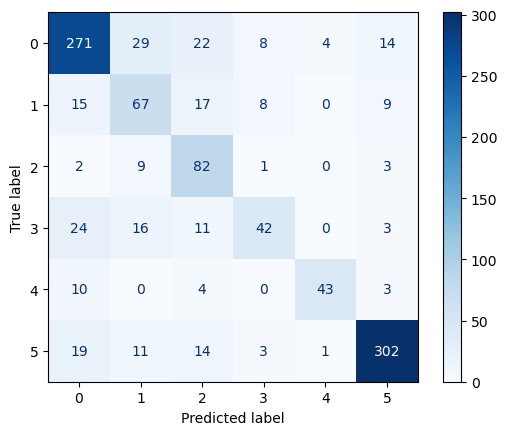

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()